# Data Preparation

In [1]:
import pandas as pd

df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

In [2]:
df_train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


## Dataset Overview

In [3]:
# Check if there are listening minutes longer than the length of the episode
df_train[df_train['Listening_Time_minutes'] > df_train['Episode_Length_minutes']]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
113,113,Current Affairs,Episode 44,17.94000,News,96.55,Saturday,Morning,13.40,1.0,Neutral,17.94199
407,407,Sound Waves,Episode 56,11.26000,Music,44.26,Wednesday,Night,66.04,0.0,Positive,11.26579
864,864,Life Lessons,Episode 29,28.92000,Lifestyle,49.84,Wednesday,Morning,19.85,2.0,Neutral,28.92051
948,948,Educational Nuggets,Episode 59,96.10732,Education,85.95,Tuesday,Evening,90.83,2.0,Neutral,96.10741
1316,1316,Market Masters,Episode 71,64.08000,Business,30.51,Sunday,Night,28.21,0.0,Positive,68.63865
...,...,...,...,...,...,...,...,...,...,...,...,...
749074,749074,Gadget Geek,Episode 90,56.05000,Technology,54.09,Monday,Morning,68.02,0.0,Positive,60.11545
749554,749554,Educational Nuggets,Episode 37,43.08000,Education,38.64,Wednesday,Afternoon,58.67,0.0,Negative,44.56000
749622,749622,Lifestyle Lounge,Episode 8,52.69000,Lifestyle,90.80,Thursday,Evening,NaN,2.0,Positive,52.69952
749649,749649,News Roundup,Episode 23,45.39000,News,96.09,Saturday,Morning,NaN,1.0,Neutral,46.61337


As we can see, there are 2568 rows contains nonsense data, i'll just delete them. But i will keep episode length minutes that contains nan, cause i want to process it later.

In [4]:
df_train = df_train[(df_train['Listening_Time_minutes'] <= df_train['Episode_Length_minutes']) | (df_train['Episode_Length_minutes'].isna())]

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 747432 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           747432 non-null  int64  
 1   Podcast_Name                 747432 non-null  object 
 2   Episode_Title                747432 non-null  object 
 3   Episode_Length_minutes       660339 non-null  float64
 4   Genre                        747432 non-null  object 
 5   Host_Popularity_percentage   747432 non-null  float64
 6   Publication_Day              747432 non-null  object 
 7   Publication_Time             747432 non-null  object 
 8   Guest_Popularity_percentage  601889 non-null  float64
 9   Number_of_Ads                747431 non-null  float64
 10  Episode_Sentiment            747432 non-null  object 
 11  Listening_Time_minutes       747432 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 74.1+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221264 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


In [7]:
for col in df_train.columns:
    if df_train[col].isnull().sum() > 0:
        print(col, "=>", df_train[col].isnull().sum())

Episode_Length_minutes => 87093
Guest_Popularity_percentage => 145543
Number_of_Ads => 1


there is only one missing value on number of ads column, i'll delete it later

In [8]:
for col in df_test.columns:
    if df_test[col].isnull().sum() > 0:
        print(col, "=>", df_test[col].isnull().sum())

Episode_Length_minutes => 28736
Guest_Popularity_percentage => 48832


In [9]:
# Check unique values for each columns
for col in df_train.columns:
    print(col, "=>", df_train[col].nunique())

id => 747432
Podcast_Name => 48
Episode_Title => 100
Episode_Length_minutes => 12079
Genre => 10
Host_Popularity_percentage => 8038
Publication_Day => 7
Publication_Time => 4
Guest_Popularity_percentage => 10019
Number_of_Ads => 12
Episode_Sentiment => 3
Listening_Time_minutes => 42807


In [10]:
for col in df_test.columns:
    print(col, "=>", df_test[col].nunique())

id => 250000
Podcast_Name => 48
Episode_Title => 100
Episode_Length_minutes => 11631
Genre => 10
Host_Popularity_percentage => 8010
Publication_Day => 7
Publication_Time => 4
Guest_Popularity_percentage => 9961
Number_of_Ads => 6
Episode_Sentiment => 3


i will not use id column on the processing step, and it doesn't contain valuable information, so i'll just drop it, next i also divide the dataset to two different categories, *categorical columns* and *numerical columns*

In [11]:
# Drop id
df_train = df_train.drop(columns=["id"], axis=1)

In [12]:
# Divide the dataset
'''
   Why don't we put number of ads variable to numerival columns? 
   because this variable contains value like 1, 2, 3, etc.
   number of ads should not contain float values.
'''

num_col = [
    "Episode_Length_minutes",
    "Host_Popularity_percentage",
    "Guest_Popularity_percentage",
    "Listening_Time_minutes"
]

cat_col = [col for col in df_train.columns if col not in num_col]

In [13]:
print("Numerical Columns:", num_col)
print("\n")
print("Categorical columns:", cat_col)

Numerical Columns: ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Listening_Time_minutes']


Categorical columns: ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Number_of_Ads', 'Episode_Sentiment']


## EDA

### Univariate Analysis

When we do an univariate analysis, it means that we looks at the range of values and the pattern each variable. 

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Categorical Columns

In [16]:
# Set up the row and column for visualization
length_cat_col = len(cat_col)
# two plots per row
cols = 2
rows = math.ceil((2*length_cat_col)/cols)
print(cols)
print(rows)

2
7


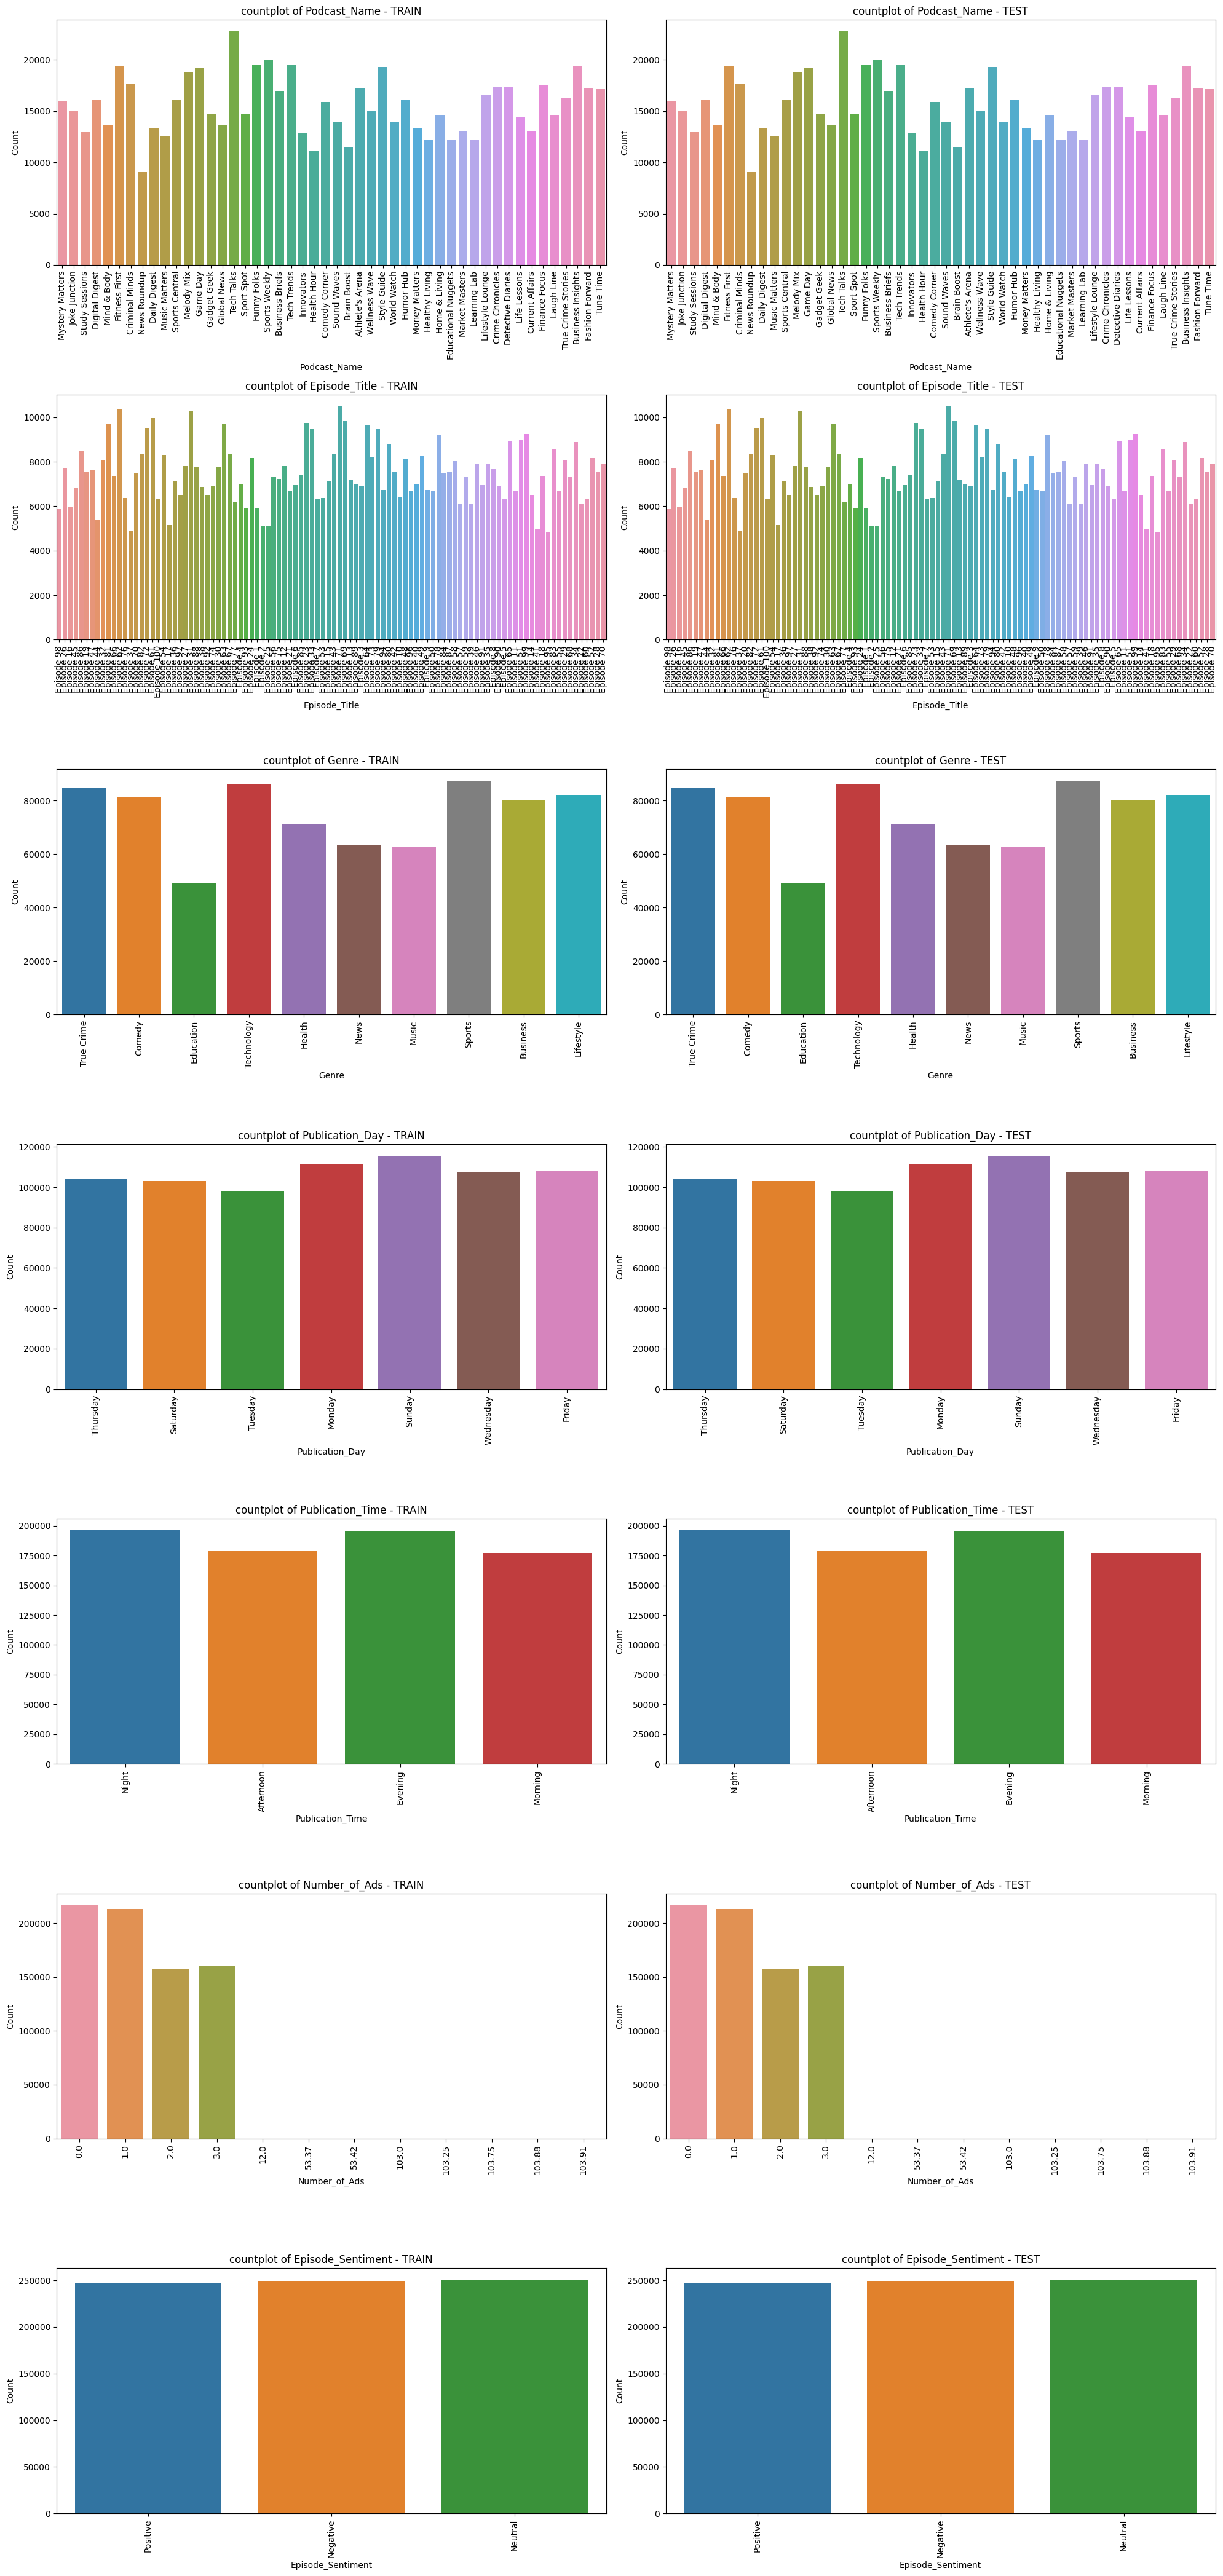

In [17]:
plt.figure(figsize=(20, rows*6))

for i, col in enumerate(cat_col):
    # Train
    plt.subplot(rows, cols, 2*i+1)
    sns.countplot(x=col, data=df_train)
    plt.title(f"countplot of {col} - TRAIN")
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel("Count")
    
    # Test
    plt.subplot(rows, cols, 2*i+2)
    sns.countplot(x=col, data=df_train)
    plt.title(f"countplot of {col} - TEST")
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

From this visualization, there are a few takeaways
- number of ads should be integer values only, but there, it contains float (which is impossible in real life)
- Columns distribution in Train and Test are almost similar

In [18]:
# Numerical Columns

In [19]:
length_num_col = len(num_col)
# four plots per row (Histogram and BoxPlot)
cols = 4
rows = math.ceil((4*length_num_col)/cols)
print(cols)
print(rows)

4
4


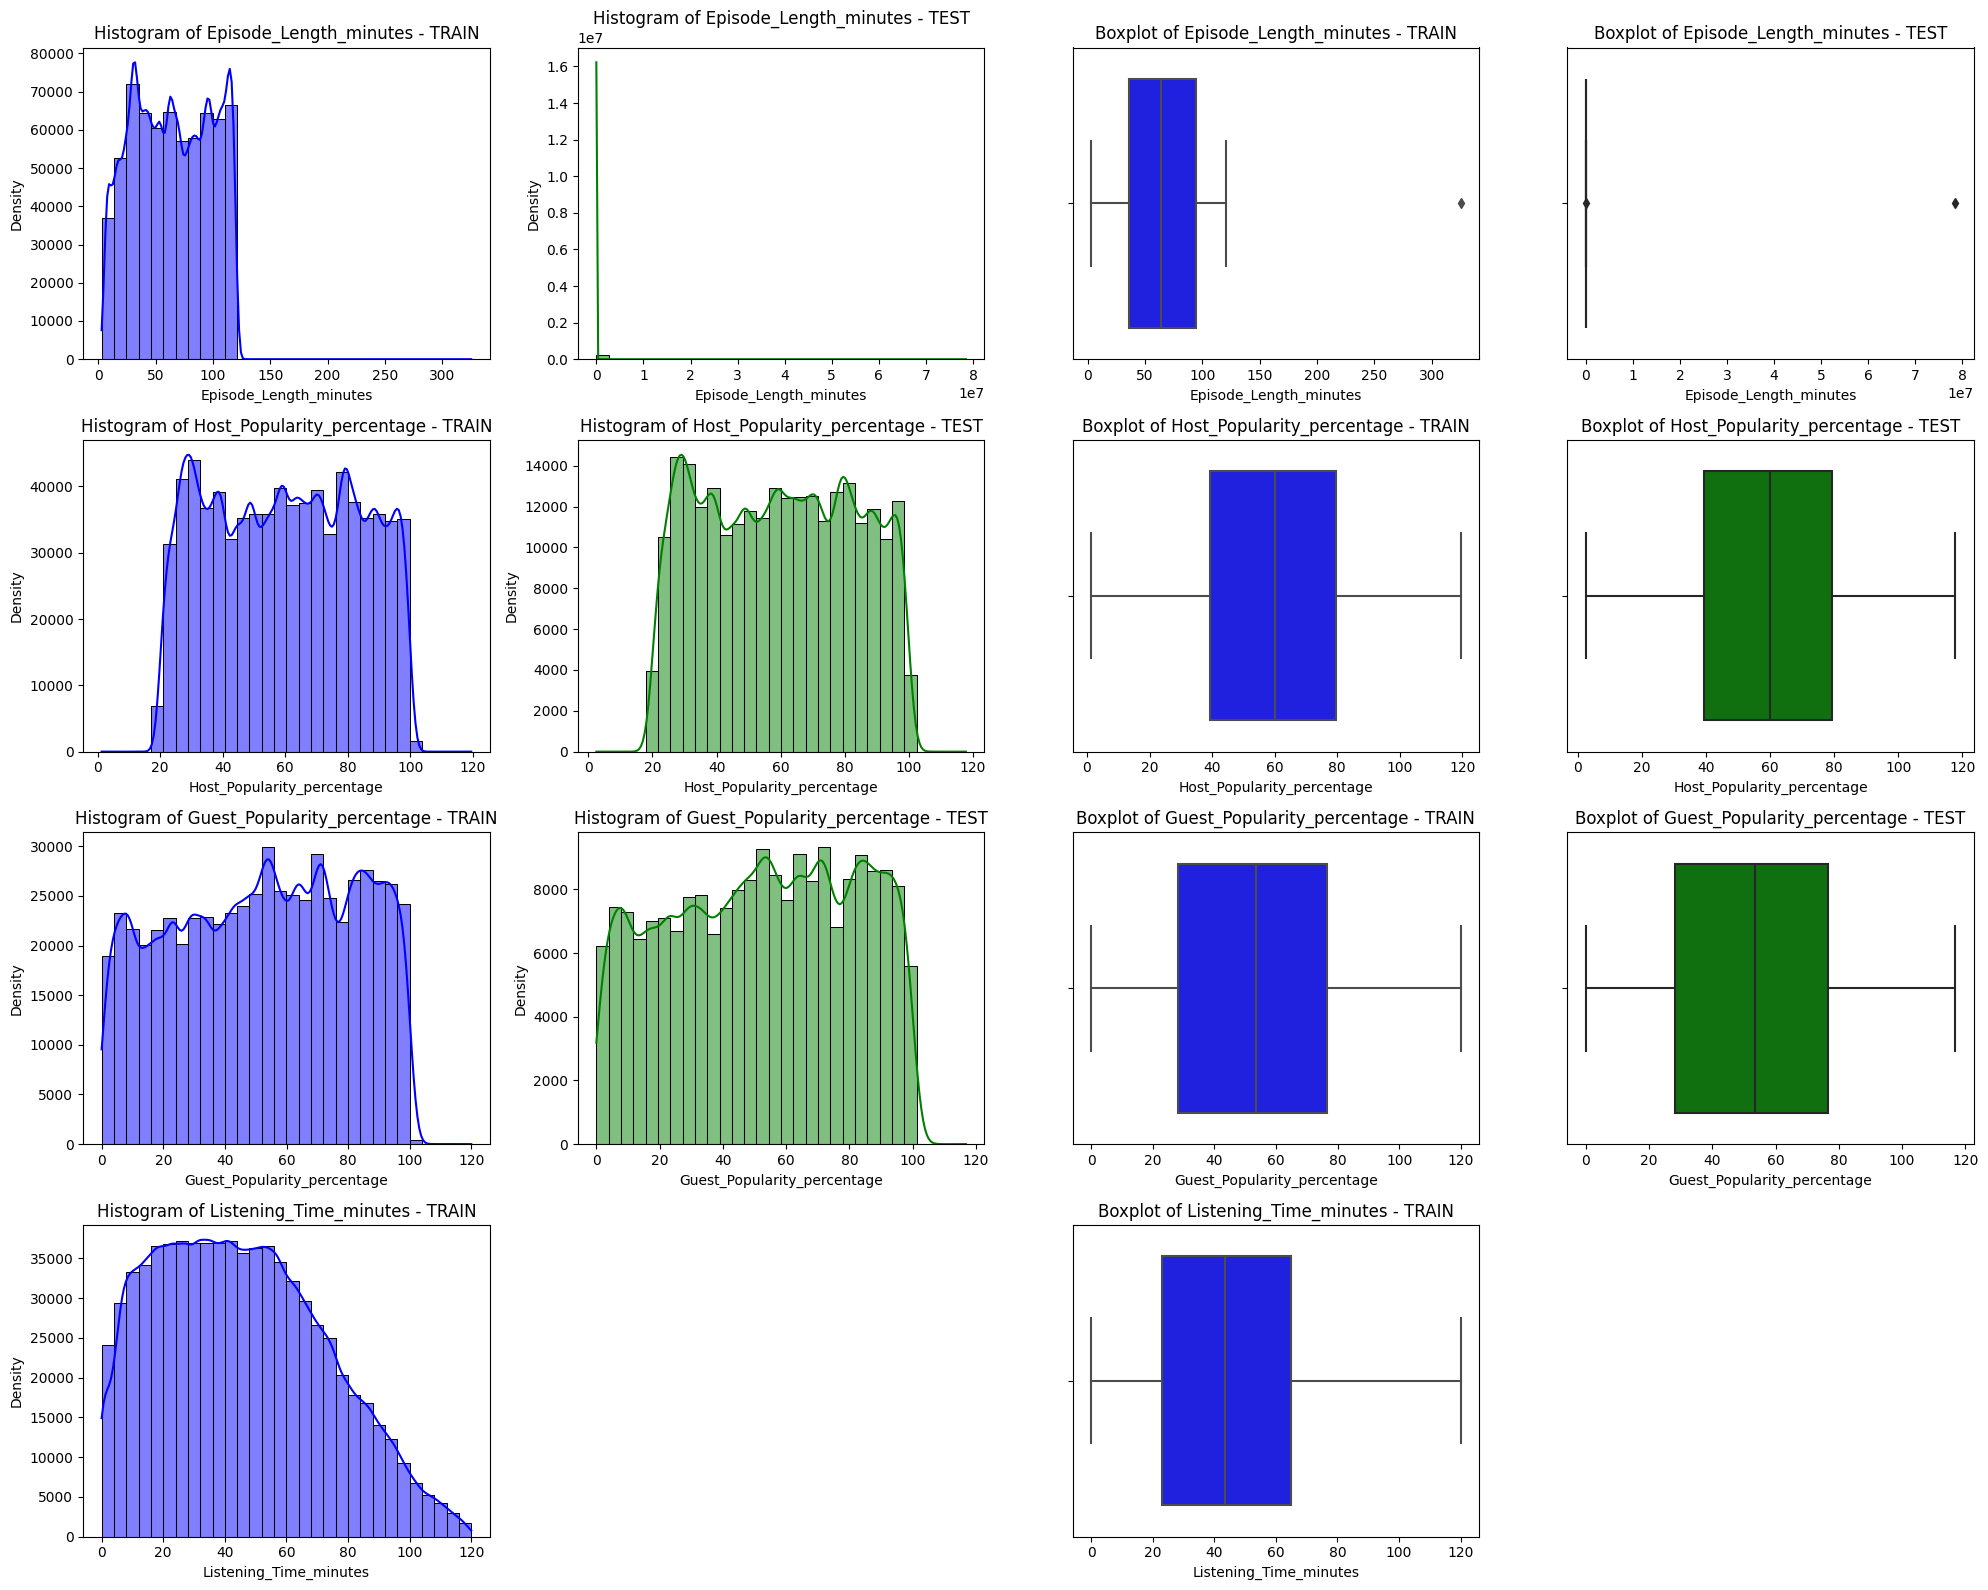

In [20]:
plt.figure(figsize=(20, rows*4))

for i, col in enumerate(num_col):
    # Train Histogram 
    plt.subplot(rows, cols, 4*i+1)
    sns.histplot(df_train[col], kde=True, bins=30, color='blue')
    plt.title(f"Histogram of {col} - TRAIN")
    plt.xlabel(col)
    plt.ylabel("Density")
    
    # Test Histogram
    if col != "Listening_Time_minutes":
        plt.subplot(rows, cols, 4*i+2)
        sns.histplot(df_test[col], kde=True, bins=30, color='green')
        plt.title(f"Histogram of {col} - TEST")
        plt.xlabel(col)
        plt.ylabel("Density")
    
    # Train Boxplot
    plt.subplot(rows, cols, 4*i+3)
    sns.boxplot(x=df_train[col], color='blue')
    plt.title(f"Boxplot of {col} - TRAIN")
    plt.xlabel(col)
    
    # Test Boxplot
    if col != "Listening_Time_minutes":
        plt.subplot(rows, cols, 4*i+4)
        sns.boxplot(x=df_test[col], color='green')
        plt.title(f"Boxplot of {col} - TEST")
        plt.xlabel(col)
    
plt.tight_layout()
plt.show()

From this visualization, there are a few takeaways
- Episode length in test dataset seems weird, it contains usually large values  should be integer values like 1e7 that equals 10 millions. It might be a typo, so it i'll need to clean it
- Based on the data, episodes with duration greater than 150 minutes can safely removed.

In [21]:
df_train[df_train["Episode_Length_minutes"] > 150]

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
101637,Home & Living,Episode 16,325.24,Lifestyle,50.69,Tuesday,Afternoon,15.01,0.0,Positive,64.31981


In [22]:
df_test[df_test["Episode_Length_minutes"] > 150]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
54434,804434,Current Affairs,Episode 36,7575.0,News,89.54,Saturday,Night,NaN,2.0,Negative
56597,806597,Market Masters,Episode 23,78486264.0,Business,55.45,Monday,Evening,48.5,0.0,Positive


There are two rows that contains episode length minutes > 150 in test data. One row have 7575 minutes, which is 126 hours, the other row 78486264 minutes which is 149 years. These values just don't make sense. so i will replace it with nan. These two values are an outlier, regression models are very sensitive to an outlier, extrem outlier will cost a large penalties and raise error (remember we use RMSE as our metric)

In [23]:
import numpy as np

df_train.loc[df_train['Episode_Length_minutes'] > 150, 'Episode_Length_minutes'] = np.nan
df_test.loc[df_test['Episode_Length_minutes'] > 150, 'Episode_Length_minutes'] = np.nan

### Bivariate Analysis

#### 1. Which Genres have the highest/lowest average listening time?

In [24]:
genres = df_train['Genre'].unique()
genres

array(['True Crime', 'Comedy', 'Education', 'Technology', 'Health',
       'News', 'Music', 'Sports', 'Business', 'Lifestyle'], dtype=object)

In [25]:
len_genres = len(genres)
cols = 3
rows = (len_genres // cols) + (len_genres % cols > 0)

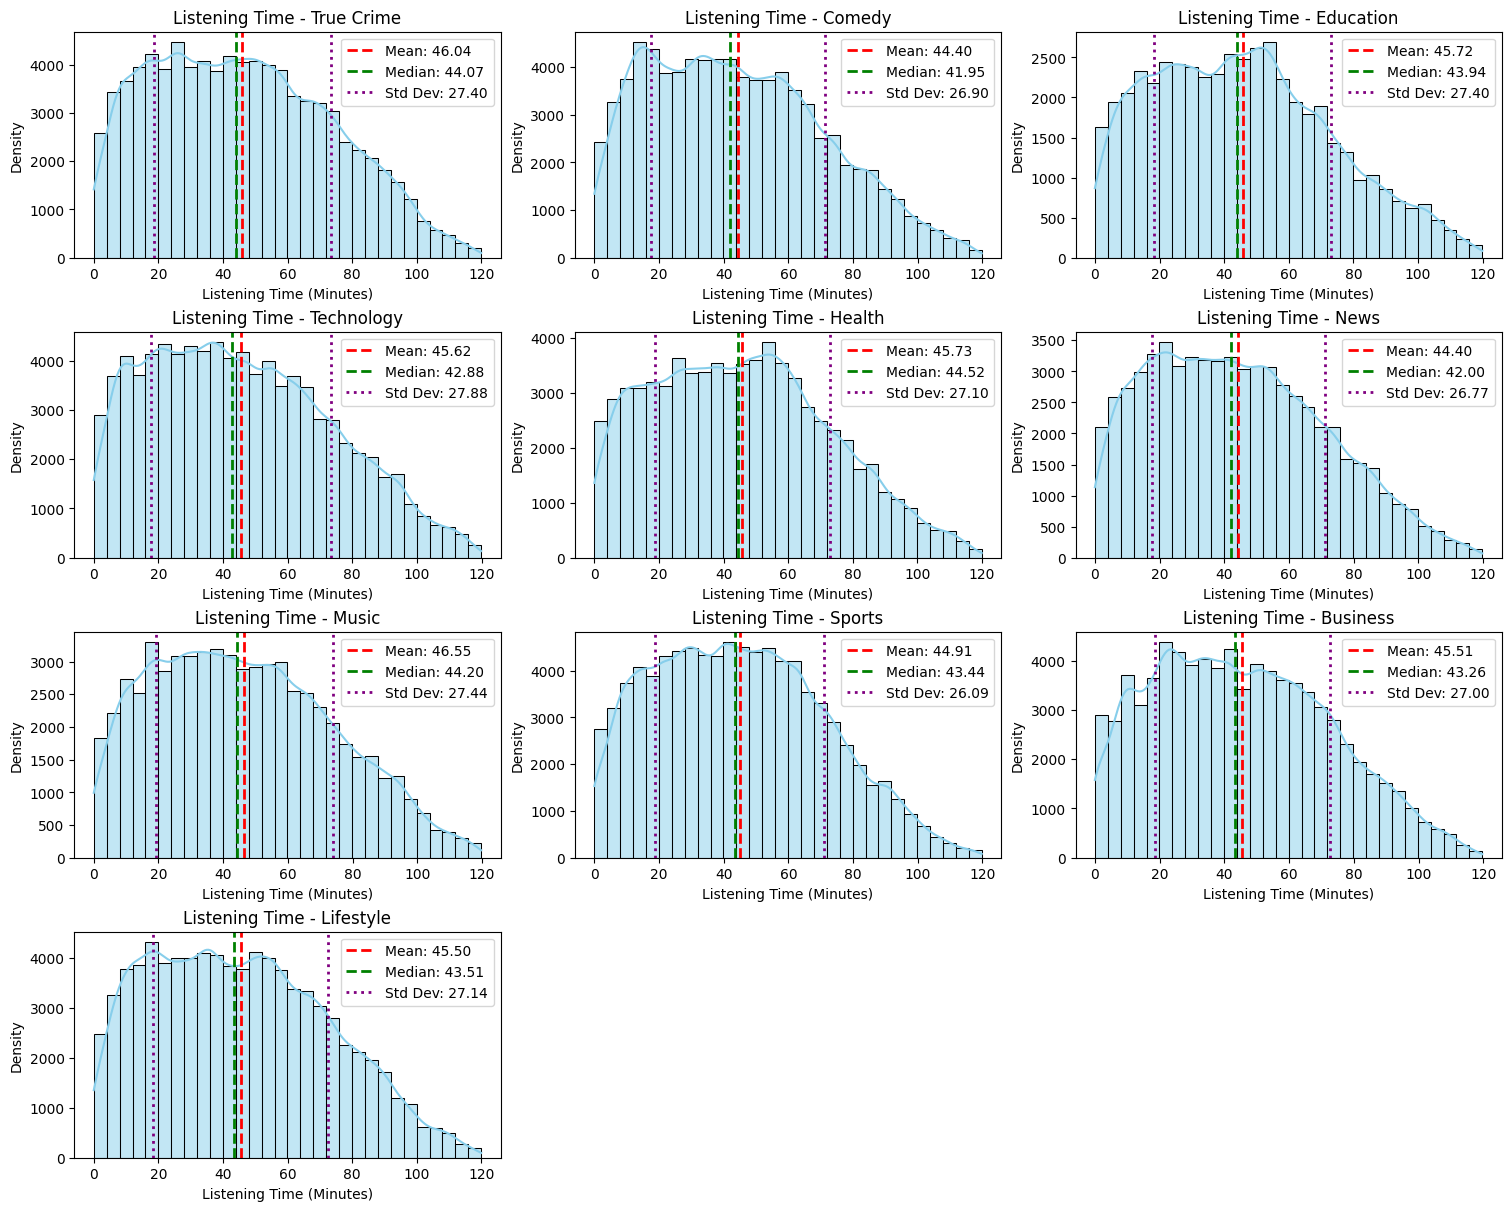

In [26]:
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows*3), constrained_layout=True)

axes = axes.flatten()

for i, genre in enumerate(genres):
    ax = axes[i]
    genre_data = df_train[df_train['Genre'] == genre]['Listening_Time_minutes']
    
    sns.histplot(genre_data, kde=True, bins=30, color='skyblue', ax=ax)
    
    mean_val = np.mean(genre_data)
    median_val = np.median(genre_data)
    std_val = np.std(genre_data)
    
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.axvline(mean_val + std_val, color='purple', linestyle='dotted', linewidth=2, label=f'Std Dev: {std_val:.2f}')
    ax.axvline(mean_val - std_val, color='purple', linestyle='dotted', linewidth=2)
    
    ax.set_title(f'Listening Time - {genre}', fontsize = 12)
    ax.set_xlabel('Listening Time (Minutes)')
    ax.set_ylabel('Density')
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Music, True Crime, and Health have the highest average listening minutes, while Comedy and News have the lowest. From the standard deviation, which ranges between 26–28 minutes across all genres, we can conclude that there is no genre with extreme variation in listening time.

#### 2. Does Episode Sentiment impact listening time accross genres?

In [27]:
len_genres = len(genres)
cols = 3
rows = (len_genres // cols) + (len_genres % cols > 0)

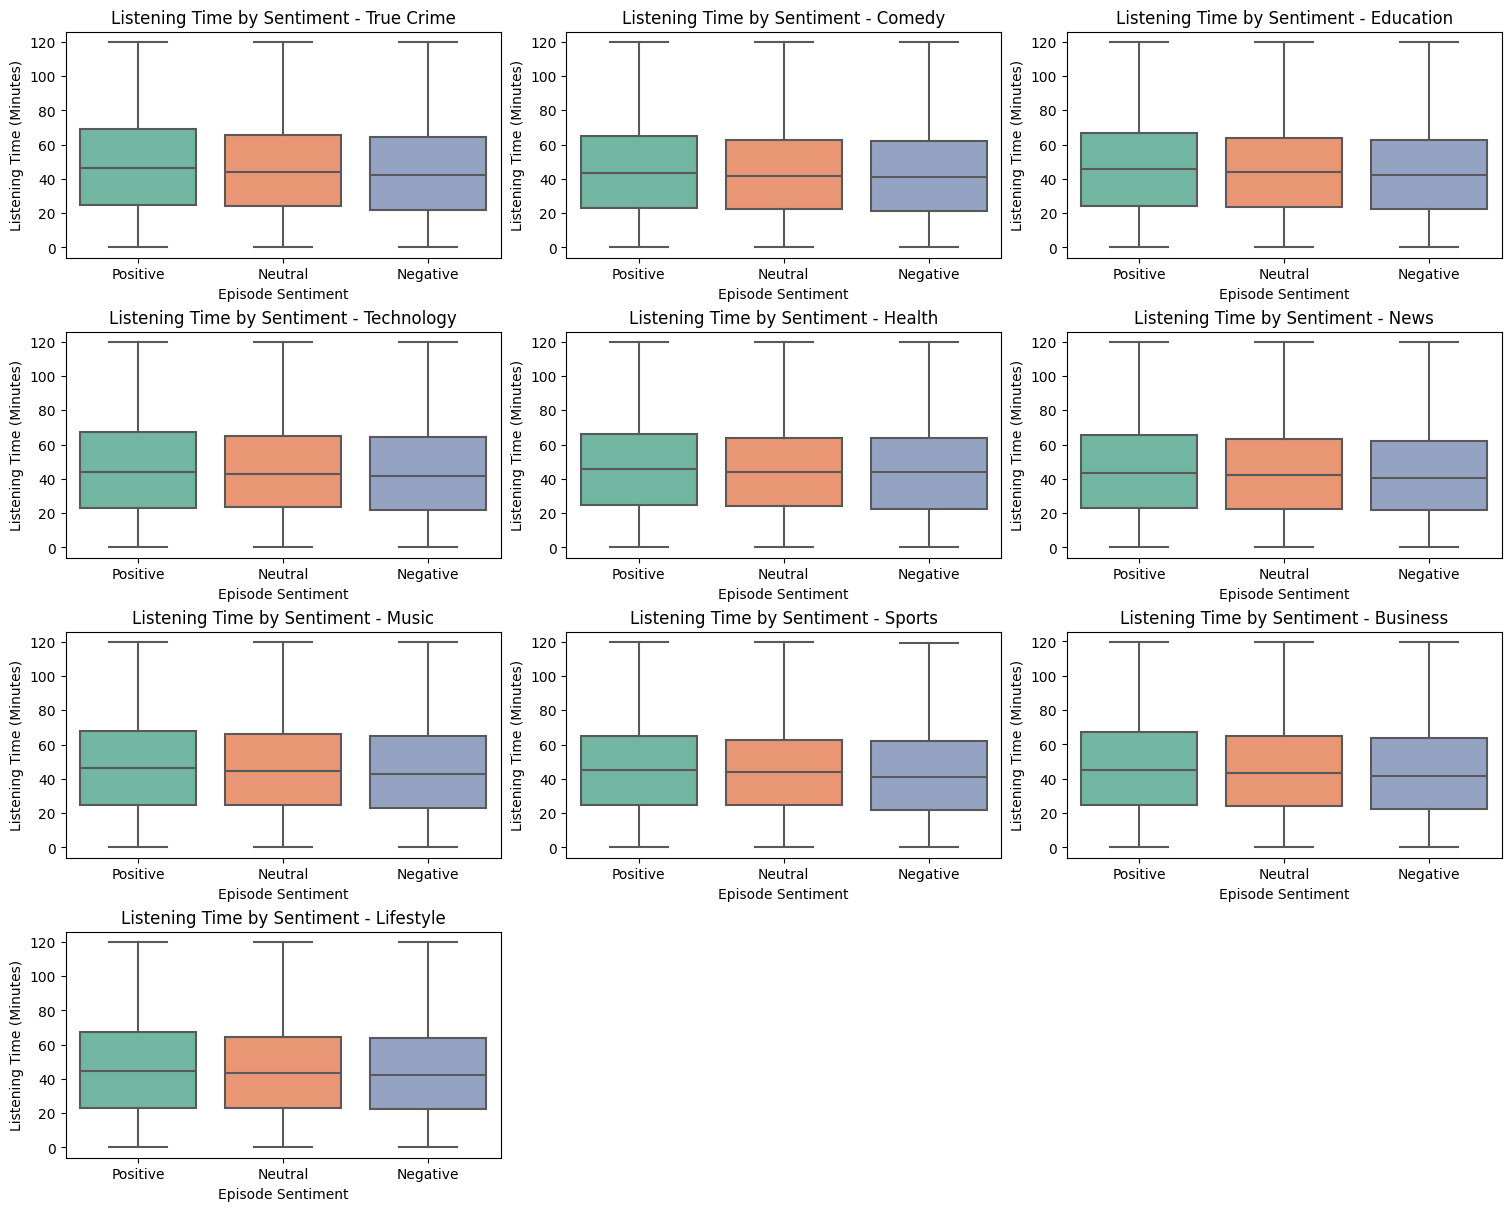

In [28]:
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 3), constrained_layout=True)
axes = axes.flatten()

for i, genre in enumerate(genres):
    ax = axes[i]
    genre_data = df_train[df_train['Genre']==genre]
    
    sns.boxplot(data=genre_data, x='Episode_Sentiment', y='Listening_Time_minutes', ax=ax, palette='Set2', order=['Positive', 'Neutral', 'Negative'])
    ax.set_title(f'Listening Time by Sentiment - {genre}', fontsize=12)
    ax.set_xlabel('Episode Sentiment')
    ax.set_ylabel('Listening Time (Minutes)')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [29]:
from scipy.stats import f_oneway

for genre in genres:
    genre_data = df_train[df_train['Genre']==genre]
    
    positive_data = genre_data[genre_data['Episode_Sentiment'] == 'Positive']['Listening_Time_minutes'].dropna()
    neutral_data = genre_data[genre_data['Episode_Sentiment'] == 'Neutral']['Listening_Time_minutes'].dropna()
    negative_data = genre_data[genre_data['Episode_Sentiment'] == 'Negative']['Listening_Time_minutes'].dropna()
    
    # one-way ANOVA (Analysis of Variance)
    f_stat, p_value = f_oneway(positive_data, neutral_data, negative_data)
    
    # Check if p-value < significance level (usually 0.05)
    if p_value < 0.05:
        print(f"For genre '{genre}', listening time is significanly different accross sentiment categories (p-value = {p_value:.4f})")
    else:
        print(f"For genre '{genre}', listening time is not significanly different accross sentiment categories (p-value = {p_value:.4f})")

For genre 'True Crime', listening time is significanly different accross sentiment categories (p-value = 0.0000)
For genre 'Comedy', listening time is significanly different accross sentiment categories (p-value = 0.0000)
For genre 'Education', listening time is significanly different accross sentiment categories (p-value = 0.0000)
For genre 'Technology', listening time is significanly different accross sentiment categories (p-value = 0.0000)
For genre 'Health', listening time is significanly different accross sentiment categories (p-value = 0.0000)
For genre 'News', listening time is significanly different accross sentiment categories (p-value = 0.0000)
For genre 'Music', listening time is significanly different accross sentiment categories (p-value = 0.0000)
For genre 'Sports', listening time is significanly different accross sentiment categories (p-value = 0.0000)
For genre 'Business', listening time is significanly different accross sentiment categories (p-value = 0.0000)
For genre

Based on the ANOVA test conducted for each genre, all p-values were found to be less than 0.05.
This indicates that the differences in listening time across episode sentiment categories are statistically significant for every genre.
Therefore, the sentiment of an episode (positive, neutral, negative) has a meaningful impact on how long listeners engage with the podcast, depending on the genre.
This suggests that the emotional tone or impression of an episode plays an important role in audience engagement.

#### 3. Does the Episode Length affect listening time?

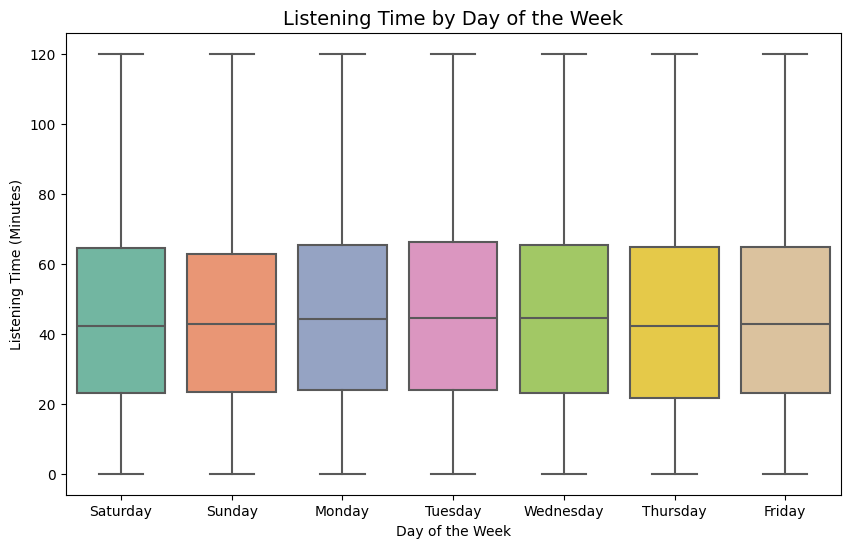

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_train, x='Publication_Day', y='Listening_Time_minutes', palette='Set2', order=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

plt.title('Listening Time by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Listening Time (Minutes)')
plt.show()

Based on the boxplot visualization above, podcast listening time tends to be higher during weekdays (Monday to Wednesday), with a slight drop on Thursday and a rise again on Friday. On weekends (Saturday and Sunday), there is a noticeable decrease in average listening time. This suggests that listeners are more likely to engage with podcasts during weekdays, possibly as a companion during work or daily routines. In contrast, weekends may be reserved for rest or other activities, resulting in less time spent listening to podcasts.

#### 4. Does the Publication Time affect listening time?

In [31]:
time = df_train['Publication_Time'].unique()
time

array(['Night', 'Afternoon', 'Evening', 'Morning'], dtype=object)

In [32]:
len_time = len(time)
cols = 2
rows = (len_time // cols) + (len_time % cols > 0)

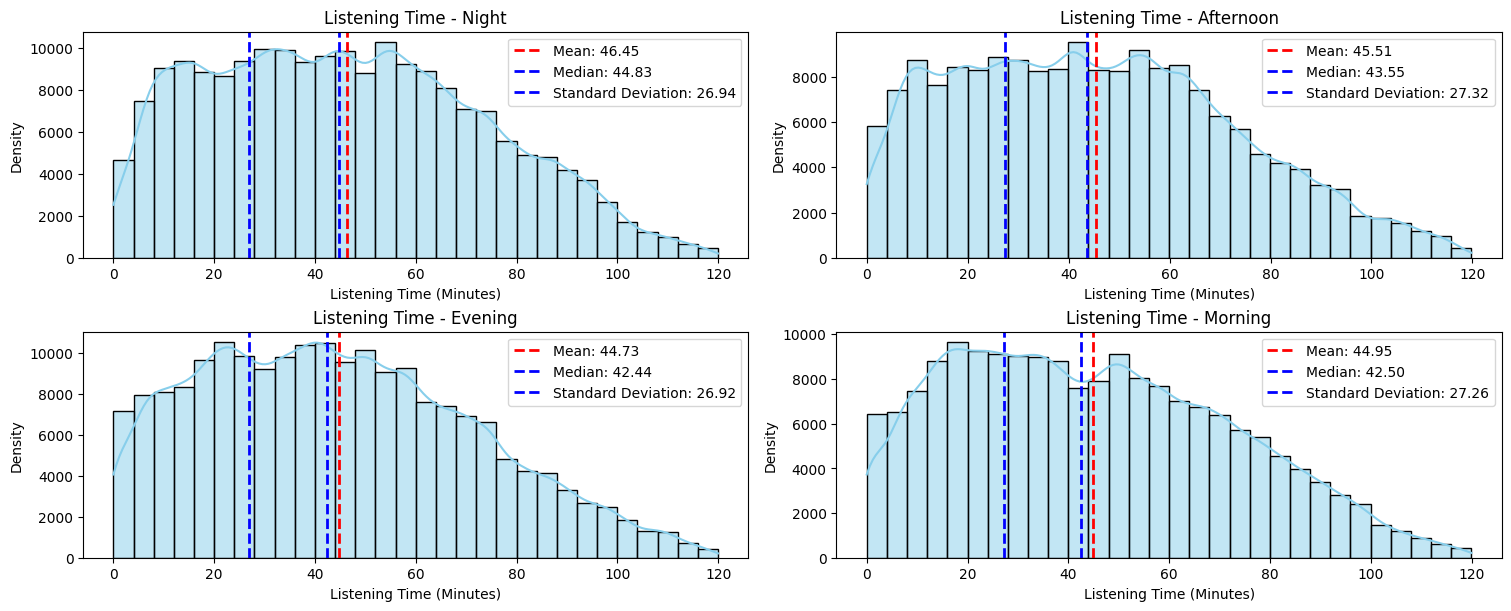

In [33]:
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows*3), constrained_layout=True)

axes = axes.flatten()

for i, t in enumerate(time):
    ax = axes[i]
    time_data = df_train[df_train['Publication_Time']==t]['Listening_Time_minutes']
    sns.histplot(time_data, kde=True, bins=30, color='skyblue', ax=ax)
    
    mean_val = np.mean(time_data)
    median_val = np.median(time_data)
    std_val = np.std(time_data)
    
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.axvline(std_val, color='blue', linestyle='dashed', linewidth=2, label=f'Standard Deviation: {std_val:.2f}')
    
    ax.set_title(f'Listening Time - {t}', fontsize=12)
    ax.set_xlabel('Listening Time (Minutes)')
    ax.set_ylabel('Density')
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Users tend to have diverse listening durations, ranging from very short to quite long, across all publication times. The distribution also contains more values (e.g., users listening for over 100 minutes)

#### 5. Do podcast with a more popular host get more listening time?

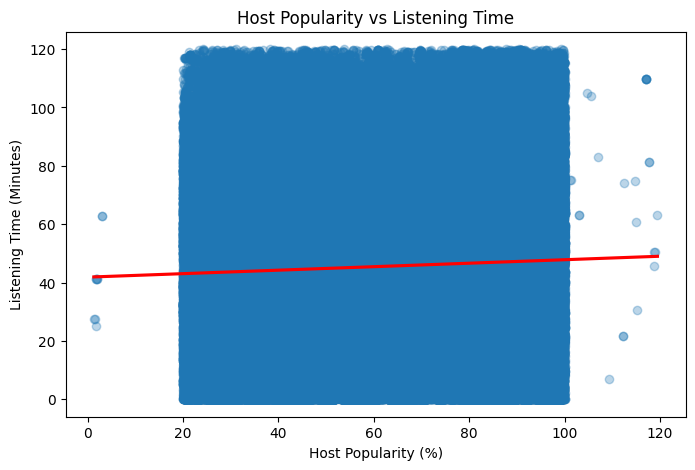

In [34]:
plt.figure(figsize=(8,5))
sns.regplot(x=df_train['Host_Popularity_percentage'], y=df_train['Listening_Time_minutes'],
            scatter_kws={'alpha':0.3},
            line_kws={'color' : 'red'})

plt.title("Host Popularity vs Listening Time")
plt.xlabel("Host Popularity (%)")
plt.ylabel("Listening Time (Minutes)")
plt.show()

In [35]:
correlation = df_train['Host_Popularity_percentage'].corr(df_train['Listening_Time_minutes'])
print(f'Correlation coefficient: {correlation:.3f}')

Correlation coefficient: 0.050


The correlation coefficient of 0.050 indicates a very weak positive relationship between Host Popularity and Listening Time, which is almost statistically insignificant. Although the regression line slightly slopes upward, suggesting a minor increase in listening time as host popularity rises, the effect is minimal. This implies that host popularity does not have a meaningful influence on how long users listen, based on the current data.

#### 6. Do podcast with a popular guest get more listening time?

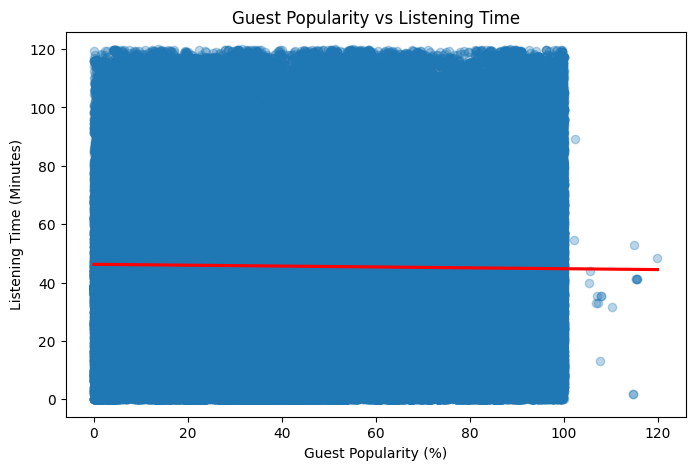

In [36]:
plt.figure(figsize=(8,5))
sns.regplot(x=df_train['Guest_Popularity_percentage'], y=df_train['Listening_Time_minutes'],
            scatter_kws={'alpha':0.3},
            line_kws={'color' : 'red'})

plt.title("Guest Popularity vs Listening Time")
plt.xlabel("Guest Popularity (%)")
plt.ylabel("Listening Time (Minutes)")
plt.show()

In [37]:
correlation = df_train['Guest_Popularity_percentage'].corr(df_train['Listening_Time_minutes'])
print(f'Correlation coefficient: {correlation:.3f}')

Correlation coefficient: -0.016


The correlation between Guest Popularity and Listening Time is nearly zero, indicating that guest popularity has no meaningful impact on how long users listen to an episode.

#### 7. Does combined popularity affect listening time?

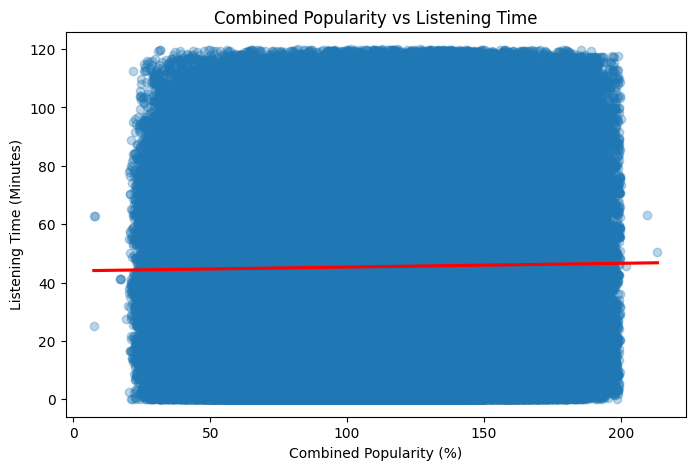

In [38]:
combined_popularity = df_train['Host_Popularity_percentage'] + df_train['Guest_Popularity_percentage']

plt.figure(figsize=(8,5))
sns.regplot(x=combined_popularity, y=df_train['Listening_Time_minutes'],
            scatter_kws={'alpha':0.3},
            line_kws={'color' : 'red'})

plt.title("Combined Popularity vs Listening Time")
plt.xlabel("Combined Popularity (%)")
plt.ylabel("Listening Time (Minutes)")
plt.show()

In [39]:
correlation = combined_popularity.corr(df_train['Listening_Time_minutes'])
print(f'Correlation coefficient: {correlation:.3f}')

Correlation coefficient: 0.018


The correlation between Combined Popularity and Listening Time is extremely weak (r = 0.018), indicating that the combined popularity of hosts and guests has virtually no impact on how long users listen to an episode.

#### 8. How does ad density impact listening time?

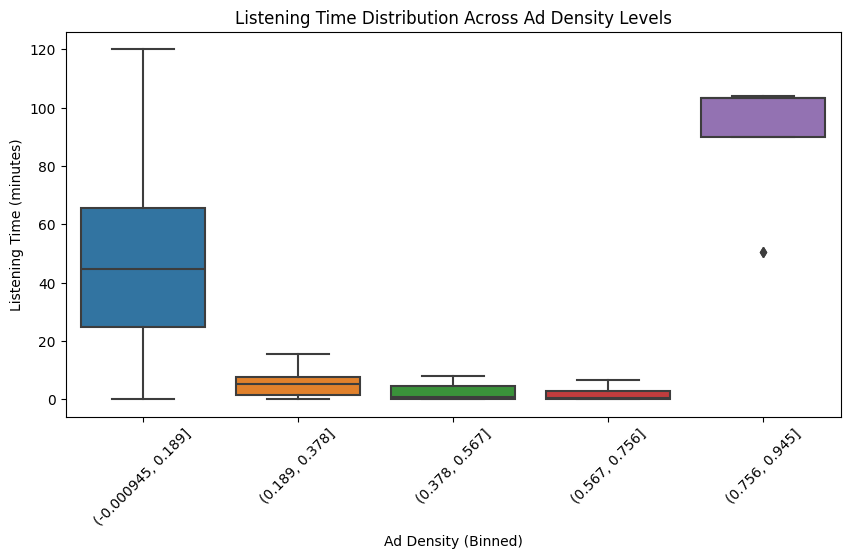

In [40]:
ad_density = df_train['Number_of_Ads'] / df_train['Episode_Length_minutes']

ad_density_bins = pd.cut(ad_density, bins=5)


plt.figure(figsize=(10,5))
sns.boxplot(x=ad_density_bins, y=df_train['Listening_Time_minutes'])
plt.xticks(rotation=45)
plt.title("Listening Time Distribution Across Ad Density Levels")
plt.xlabel("Ad Density (Binned)")
plt.ylabel("Listening Time (minutes)")
plt.show()

## Data Preprocessing

### Null Value Imputation 

In [41]:
df_train.isnull().sum()

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87094
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    145543
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [42]:
df_test.isnull().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28738
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

- There is only one row with a null value in the Number of Ads column in the training set, so it can simply be dropped.
- For Guest Popularity Percentage, fill the null values with the average popularity percentage for each podcast.
- For Episode Length (minutes), filling null values with a constant value like the overall column mean is not ideal, as it may lead to inconsistencies—such as having Listening Time greater than Episode Length. Therefore, null values will be filled using the mean Episode Length for each combination of Podcast Name and Episode Title.

In [43]:
# Number of Ads
df_train = df_train[df_train['Number_of_Ads'].notna()]
df_train.isnull().sum()

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87094
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    145543
Number_of_Ads                       0
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [44]:
# Guest Popularity Train
df_train['Guest_Popularity_percentage'] = df_train.groupby(['Podcast_Name'])['Guest_Popularity_percentage'].transform(lambda x:x.fillna(x.mean().round(2)))
print(df_train.isnull().sum())

Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         87094
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage        0
Number_of_Ads                      0
Episode_Sentiment                  0
Listening_Time_minutes             0
dtype: int64


In [45]:
# Guest Popularity Test
df_test['Guest_Popularity_percentage'] = df_test.groupby(['Podcast_Name'])['Guest_Popularity_percentage'].transform(lambda x:x.fillna(x.mean().round(2)))
print(df_test.isnull().sum())

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28738
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage        0
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64


In [46]:
# Episode Length Minutes Train
df_train['Episode_Length_minutes'] = df_train.groupby(['Podcast_Name', 'Episode_Title'])['Episode_Length_minutes'].transform(lambda x: x.fillna(x.mean().round(2)))
print(df_train.isnull().sum())

Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64


In [47]:
# Episode Length Minutes Test
df_test['Episode_Length_minutes'] = df_test.groupby(['Podcast_Name', 'Episode_Title'])['Episode_Length_minutes'].transform(lambda x: x.fillna(x.mean().round(2)))
print(df_test.isnull().sum())

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
dtype: int64


### Create New Feature

In [48]:
bins = [-1, 30, 50, 80, np.inf]
labels = [0, 1, 2, 3]

In [49]:
df_train['Combined_Popularity'] = (df_train['Host_Popularity_percentage'] + df_train['Guest_Popularity_percentage'])/2
df_test['Combined_Popularity'] = (df_test['Host_Popularity_percentage'] + df_test['Guest_Popularity_percentage'])/2

df_train['Combined_Popularity_Level'] = pd.cut(df_train['Combined_Popularity'], bins, labels=labels)
df_test['Combined_Popularity_Level'] = pd.cut(df_test['Combined_Popularity'], bins, labels=labels)

df_train['Host_Popularity_Level'] = pd.cut(df_train['Host_Popularity_percentage'], bins, labels=labels)
df_test['Host_Popularity_Level'] = pd.cut(df_test['Host_Popularity_percentage'], bins, labels=labels)

df_train['Guest_Popularity_Level'] = pd.cut(df_train['Guest_Popularity_percentage'], bins, labels=labels)
df_test['Guest_Popularity_Level'] = pd.cut(df_test['Guest_Popularity_percentage'], bins, labels=labels)

In [50]:
df_train

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Combined_Popularity,Combined_Popularity_Level,Host_Popularity_Level,Guest_Popularity_Level
0,Mystery Matters,Episode 98,56.19,True Crime,74.81,Thursday,Night,52.23,0.0,Positive,31.41998,63.520,2,2,2
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,71.450,2,2,2
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,39.470,1,2,0
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,67.960,2,2,2
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,69.375,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,52.44,0.0,Negative,56.87058,60.900,2,2,2
749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,51.26,2.0,Neutral,45.46242,43.235,1,1,2
749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000,81.735,3,2,3
749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939,69.330,2,1,3


In [51]:
ad_density = df_train['Number_of_Ads'] / df_train['Episode_Length_minutes']
labels = [0, 1, 2, 3, 4]

df_train['ad_density'] = pd.cut(ad_density, bins=5, labels=labels)
df_test['ad_density'] = pd.cut(ad_density, bins=5, labels=labels)

In [52]:
weekday_mapping = {
    "Sunday":0,
    "Monday":1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6
}

df_train['Publication_Day'] = df_train['Publication_Day'].map(weekday_mapping)
df_train['Publication_Day_sin'] = np.sin(2 * np.pi * df_train['Publication_Day']/7)
df_train['Publication_Day_cos'] = np.cos(2 * np.pi * df_train['Publication_Day']/7)

df_train.drop(columns = ['Publication_Day'], inplace=True)

df_test['Publication_Day'] = df_test['Publication_Day'].map(weekday_mapping)
df_test['Publication_Day_sin'] = np.sin(2 * np.pi * df_test['Publication_Day']/7)
df_test['Publication_Day_cos'] = np.cos(2 * np.pi * df_test['Publication_Day']/7)

df_test.drop(columns = ['Publication_Day'], inplace=True)

Cyclical encoding uses sine and cosine functions to transform cyclical features (like days of the week or hours in a day) into two numerical values. This helps machine learning models understand the "wrap-around" nature of these features.

For example, if we encode days of the week (0 = Sunday, 6 = Saturday), a model might think Saturday (6) is far from Sunday (0), even though they're next to each other. To fix this, we use:

sin(2π * value / period)

cos(2π * value / period)

Here:

value is the original number (e.g., 0–6 for days),

period is the full cycle (e.g., 7 for days of the week),

This maps each value to a point on a circle.

With this, Sunday (0) and Saturday (6) end up close to each other again in terms of their sine and cosine values — preserving their true relationship.

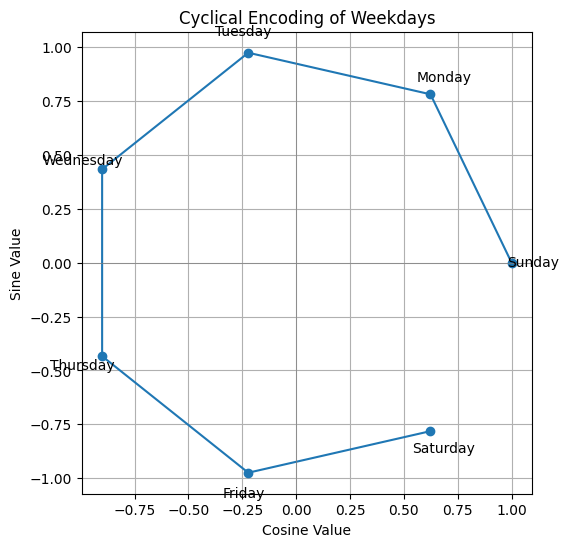

In [53]:
time_mapping = {
    "Morning":0,
    "Afternoon":1,
    "Evening":2,
    "Night":3
}

df_train['Publication_Time'] = df_train['Publication_Time'].map(time_mapping)
df_train['Publication_Time_sin'] = np.sin(2 * np.pi * df_train['Publication_Time']/7)
df_train['Publication_Time_cos'] = np.cos(2 * np.pi * df_train['Publication_Time']/7)

df_train.drop(columns = ['Publication_Time'], inplace=True)

df_test['Publication_Time'] = df_test['Publication_Time'].map(time_mapping)
df_test['Publication_Time_sin'] = np.sin(2 * np.pi * df_test['Publication_Time']/7)
df_test['Publication_Time_cos'] = np.cos(2 * np.pi * df_test['Publication_Time']/7)

df_test.drop(columns = ['Publication_Time'], inplace=True)

This visualization shows the cyclical encoding of publication times using sine and cosine functions. By mapping "Morning", "Afternoon", "Evening", and "Night" to positions on a circle, the model can learn the natural progression of time. For example, "Night" is close to "Morning" in the cycle, which would not be captured by simple numeric encoding. This approach helps preserve the circular relationship between time categories.

In [54]:
df_train.columns

Index(['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Guest_Popularity_percentage',
       'Number_of_Ads', 'Episode_Sentiment', 'Listening_Time_minutes',
       'Combined_Popularity', 'Combined_Popularity_Level',
       'Host_Popularity_Level', 'Guest_Popularity_Level', 'ad_density',
       'Publication_Day_sin', 'Publication_Day_cos', 'Publication_Time_sin',
       'Publication_Time_cos'],
      dtype='object')

In [55]:
df_test.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Guest_Popularity_percentage',
       'Number_of_Ads', 'Episode_Sentiment', 'Combined_Popularity',
       'Combined_Popularity_Level', 'Host_Popularity_Level',
       'Guest_Popularity_Level', 'ad_density', 'Publication_Day_sin',
       'Publication_Day_cos', 'Publication_Time_sin', 'Publication_Time_cos'],
      dtype='object')

In [56]:
df_train['Episode_Title'] = df_train['Episode_Title'].str.split(" ", expand=True)[1].astype(np.uint16)
df_test['Episode_Title'] = df_test['Episode_Title'].str.split(" ", expand=True)[1].astype(np.uint16)

In [57]:
df_train['Episode_Length_sin'] = np.sin(2 * np.pi * df_train['Episode_Length_minutes']/60)
df_test['Episode_Length_sin'] = np.sin(2 * np.pi * df_test['Episode_Length_minutes']/60)

In [58]:
df_train

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Combined_Popularity,Combined_Popularity_Level,Host_Popularity_Level,Guest_Popularity_Level,ad_density,Publication_Day_sin,Publication_Day_cos,Publication_Time_sin,Publication_Time_cos,Episode_Length_sin
0,Mystery Matters,98,56.19,True Crime,74.81,52.23,0.0,Positive,31.41998,63.520,2,2,2,0,-0.433884,-0.900969,0.433884,-0.900969,-0.388481
1,Joke Junction,26,119.80,Comedy,66.95,75.95,2.0,Negative,88.01241,71.450,2,2,2,0,-0.781831,0.623490,0.781831,0.623490,-0.020942
2,Study Sessions,16,73.90,Education,69.97,8.97,0.0,Negative,44.92531,39.470,1,2,0,0,0.974928,-0.222521,0.974928,-0.222521,0.993373
3,Digital Digest,45,67.17,Technology,57.22,78.70,2.0,Positive,46.27824,67.960,2,2,2,0,0.781831,0.623490,0.000000,1.000000,0.682254
4,Mind & Body,86,110.51,Health,80.07,58.68,3.0,Neutral,75.61031,69.375,2,3,2,0,0.781831,0.623490,0.781831,0.623490,-0.838100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,Learning Lab,25,75.66,Education,69.36,52.44,0.0,Negative,56.87058,60.900,2,2,2,0,-0.781831,0.623490,0.000000,1.000000,0.997613
749996,Business Briefs,21,75.75,Business,35.21,51.26,2.0,Neutral,45.46242,43.235,1,1,2,0,-0.781831,0.623490,0.433884,-0.900969,0.996917
749997,Lifestyle Lounge,51,30.98,Lifestyle,78.58,84.89,0.0,Negative,15.26000,81.735,3,2,3,0,-0.433884,-0.900969,0.000000,1.000000,-0.102445
749998,Style Guide,47,108.98,Lifestyle,45.39,93.27,0.0,Negative,100.72939,69.330,2,1,3,0,-0.433884,-0.900969,0.000000,1.000000,-0.914395


### Categorical Value Encoding

In [59]:
cat_col = ['Podcast_Name', 'Genre', 'Episode_Sentiment']

In [60]:
from sklearn.preprocessing import LabelEncoder

for col in cat_col:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.fit_transform(df_test[col])

In [61]:
df_train

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Combined_Popularity,Combined_Popularity_Level,Host_Popularity_Level,Guest_Popularity_Level,ad_density,Publication_Day_sin,Publication_Day_cos,Publication_Time_sin,Publication_Time_cos,Episode_Length_sin
0,34,98,56.19,9,74.81,52.23,0.0,2,31.41998,63.520,2,2,2,0,-0.433884,-0.900969,0.433884,-0.900969,-0.388481
1,24,26,119.80,1,66.95,75.95,2.0,0,88.01241,71.450,2,2,2,0,-0.781831,0.623490,0.781831,0.623490,-0.020942
2,40,16,73.90,2,69.97,8.97,0.0,0,44.92531,39.470,1,2,0,0,0.974928,-0.222521,0.974928,-0.222521,0.993373
3,10,45,67.17,8,57.22,78.70,2.0,2,46.27824,67.960,2,2,2,0,0.781831,0.623490,0.000000,1.000000,0.682254
4,31,86,110.51,3,80.07,58.68,3.0,1,75.61031,69.375,2,3,2,0,0.781831,0.623490,0.781831,0.623490,-0.838100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,26,25,75.66,2,69.36,52.44,0.0,0,56.87058,60.900,2,2,2,0,-0.781831,0.623490,0.000000,1.000000,0.997613
749996,2,21,75.75,0,35.21,51.26,2.0,1,45.46242,43.235,1,1,2,0,-0.781831,0.623490,0.433884,-0.900969,0.996917
749997,28,51,30.98,4,78.58,84.89,0.0,0,15.26000,81.735,3,2,3,0,-0.433884,-0.900969,0.000000,1.000000,-0.102445
749998,41,47,108.98,4,45.39,93.27,0.0,0,100.72939,69.330,2,1,3,0,-0.433884,-0.900969,0.000000,1.000000,-0.914395


### Numerical Value Scaling

In [62]:
num_col = ['Podcast_Name','Episode_Title', 'Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Combined_Popularity']

In [63]:
from sklearn.preprocessing import StandardScaler

for col in num_col:
    scaler = StandardScaler()
    df_train[col] = scaler.fit_transform(df_train[col].values.reshape(-1, 1))
    df_test[col] = scaler.fit_transform(df_test[col].values.reshape(-1, 1))    

In [64]:
df_train

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Combined_Popularity,Combined_Popularity_Level,Host_Popularity_Level,Guest_Popularity_Level,ad_density,Publication_Day_sin,Publication_Day_cos,Publication_Time_sin,Publication_Time_cos,Episode_Length_sin
0,0.741603,1.657758,-0.269889,9,0.654626,-0.000323,0.0,2,31.41998,0.432228,2,2,2,0,-0.433884,-0.900969,0.433884,-0.900969,-0.388481
1,0.034231,-0.905980,1.781445,1,0.310896,0.928691,2.0,0,88.01241,0.890430,2,2,2,0,-0.781831,0.623490,0.781831,0.623490,-0.020942
2,1.166026,-1.262055,0.301234,2,0.442965,-1.694636,0.0,0,44.92531,-0.957402,1,2,0,0,0.974928,-0.222521,0.974928,-0.222521,0.993373
3,-0.956090,-0.229438,0.084201,8,-0.114613,1.036397,2.0,2,46.27824,0.688775,2,2,2,0,0.781831,0.623490,0.000000,1.000000,0.682254
4,0.529391,1.230468,1.481856,3,0.884654,0.252297,3.0,1,75.61031,0.770535,2,3,2,0,0.781831,0.623490,0.781831,0.623490,-0.838100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,0.175705,-0.941588,0.357992,2,0.416289,0.007902,0.0,0,56.87058,0.280842,2,2,2,0,-0.781831,0.623490,0.000000,1.000000,0.997613
749996,-1.521987,-1.084018,0.360894,0,-1.077146,-0.038313,2.0,1,45.46242,-0.739857,1,1,2,0,-0.781831,0.623490,0.433884,-0.900969,0.996917
749997,0.317179,-0.015793,-1.082876,4,0.819494,1.278833,0.0,0,15.26000,1.484706,3,2,3,0,-0.433884,-0.900969,0.000000,1.000000,-0.102445
749998,1.236763,-0.158223,1.432515,4,-0.631958,1.607043,0.0,0,100.72939,0.767935,2,1,3,0,-0.433884,-0.900969,0.000000,1.000000,-0.914395


## Save Dataset for Modelling

In [65]:
# df_train.to_csv('dataset/train_data.csv', index=False)
# df_train.to_csv('dataset/test_data.csv', index=False)

## Modelling

### Split Dataset

In [66]:
X = df_train.drop(columns=["Listening_Time_minutes"])
y = df_train["Listening_Time_minutes"]
X_test = df_test.drop(columns=['id'])

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### LightGBM (Baseline)

In [68]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# LightGBM Parameters
params = {
    "n_estimators": 3500,     # The number of boosting rounds or trees the model will train.
    "random_state": 42,       # Seed for reproducibility of results.
    "max_bin": 1024,          # The maximum number of bins used for discretizing continuous features.
    "colsample_bytree": 0.6,  # Fraction of features randomly selected for each tree (column sampling).
    "reg_lambda": 80,         # L2 regularization term on weights to prevent overfitting.
    "verbosity": -1,          # Controls the amount of logging. -1 means silent mode.
    "num_leaves": 64,         # Maximum number of leaves in one tree. Larger values increase model complexity.
    "max_depth": 15,          # Maximum depth of a tree. Helps control overfitting.
    "learning_rate": 0.05,    # Step size shrinkage to prevent overfitting and make the model generalize better.
    "feature_fraction": 0.8,  # Fraction of features to be used in each iteration of boosting.
    "bagging_fraction": 0.8,  # Fraction of data to be randomly sampled for training each tree.
    "lambda_l1": 0.1,         # L1 regularization term on weights (encourages sparsity).
    "lambda_l2": 0.1          # L2 regularization term (alias of reg_lambda), additional to above.
}

In [69]:
model_lgbm = lgb.LGBMRegressor(**params)

In [70]:
# Train Model
with tqdm(total=params['n_estimators'], desc="Training", unit="iter") as pbar:
    model_lgbm.fit(
        X_train, y_train,
        eval_metric='rmse',
        callbacks=[lgb.callback.log_evaluation(100), lgb.callback.record_evaluation({})]
    )
    pbar.update(params['n_estimators'])

Training: 100%|██████████████████████████████████████████████████████████████████| 3500/3500 [01:05<00:00, 53.28iter/s]


In [71]:
# Evaluation on validation set 
val_preds = model_lgbm.predict(X_val)
rmse = mean_squared_error(y_val, val_preds, squared=False)
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 12.9081


In [72]:
# Test Prediction
test_predictions_lgbm = model_lgbm.predict(X_test)

In [73]:
# Submission
submission = pd.DataFrame({
    "id": df_test['id'],
    "target": test_predictions_lgbm
})
submission.to_csv("dataset/submission_lgbm.csv", index=False)

### Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

# LightGBM Parameters

rf_params = {
    "n_estimators": 3500,    # Number of trees in the forest
    "random_state": 42,      # Seed for reproducibility
    "max_depth": 15,         # Maximum depth of each tree
    "max_features": "sqrt",  # Number of features to consider when looking for the best split
    "min_samples_split": 2,  # Minimum number of samples required to split an internal node
    "min_samples_leaf": 1,   # Minimum number of samples required to be at a leaf node
    "bootstrap": True,       # Whether bootstrap samples are used when building trees
    "n_jobs": -1,            # Use all available cores for training
    "verbose": 1             # Show progress during training
}

In [75]:
model_rf = RandomForestRegressor(**rf_params)

In [76]:
# Train Model
with tqdm(total=1, desc="Training Random Forest", unit="model") as pbar:
    model_rf.fit(X_train, y_train)
    pbar.update(1)

Training Random Forest:   0%|                                                                 | 0/1 [00:00<?, ?model/s][Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed: 28.3min finished
Training Random Forest: 100%|███████████████████████████████████████████████████████| 1/1 [28:22<00:00, 1702.49s/model]


In [77]:
# Evaluation on validation set 
val_preds = model_rf.predict(X_val)
rmse = mean_squared_error(y_val, val_preds, squared=False)
print(f"Validation RMSE: {rmse:.4f}")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    6.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   12.4s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   20.2s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:   29.6s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:   39.8s
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:   55.0s
[Parallel(n_jobs=8)]: Done 3500 out of 3500 | elapsed:   59.5s finished


Validation RMSE: 13.0881


In [79]:
# Test Prediction
test_predictions_rf = model_rf.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    9.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   17.9s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   28.1s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:   38.9s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:   57.4s
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 3500 out of 3500 | elapsed:  1.3min finished


In [80]:
# Submission
submission = pd.DataFrame({
    "id": df_test['id'],
    "target": test_predictions_rf
})
submission.to_csv("dataset/submission_rf.csv", index=False)